In [2]:
# !pip show opencv-python

In [1]:
# 私は仮想環境を作ったので、ここでパスを通してます…
import sys
sys.path.append('/Users/natsuko/pyladies/opencv/venv/lib/python3.7/site-packages')

import cv2
import numpy as np
import matplotlib.pyplot as plt
# Jupyter Notebook上に画像を表示させるためのマジックコマンド
%matplotlib inline

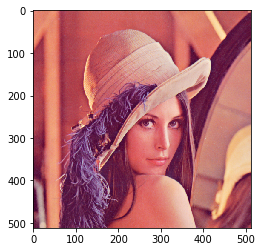

In [2]:
# 画像の読み込み
img = cv2.imread('data/lena_std.tif')
# OpenCVはBGR順、matplotlibはRGB順
img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#　結果をmatplotlibで表示
plt.imshow(img_r)

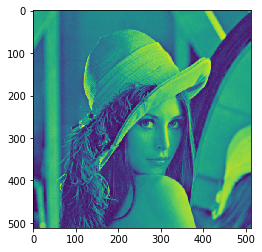

In [5]:
# 画像をグレースケールにする
img_gray = cv2.cvtColor(img_r, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)

[[217 200 179 179]]


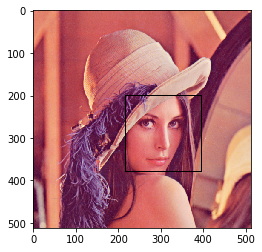

In [4]:
# GitHub: https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('/Users/natsuko/pyladies/opencv/venv/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
# カスケード分類器に画像を渡し、顔を検出する
facerect = face_cascade.detectMultiScale(img_gray)
# 検知した座標を表示
print(facerect)
#　1つ以上囲む部分があれば元の画像に枠を付け足す
if len(facerect) > 0:
    #　検出した顔を囲む枠の作成
    for rect in facerect:
        # 引数は(画像, 左上の座標, 右下の座標, 色, 枠線の太さ)
        cv2.rectangle(img, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), (0, 0, 0), thickness=2)
#　結果をmatplotlibで表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
# 顔検出を関数化
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for x, y, w, h in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255,255,255), 10)
    return face_img

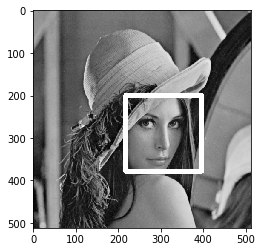

In [6]:
# グレースケールの画像で顔検出関数を実行
result_img = detect_face(img_gray)
plt.imshow(result_img, cmap="gray")

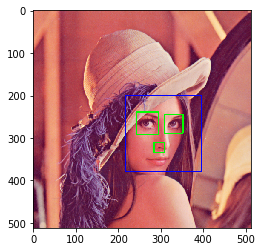

In [7]:
# 顔検出と目の検出
# 目の検出用のカスケード分類器を読み込み
eye_cascade = cv2.CascadeClassifier('/Users/natsuko/pyladies/opencv/venv/lib/python3.7/site-packages/cv2/data/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(img_gray)
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    face = img[y: y + h, x: x + w]
    face_gray = img_gray[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(face_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[[217 200 179 179]]


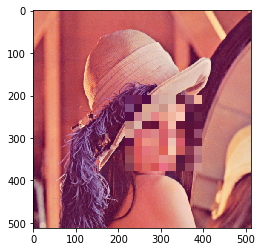

In [8]:
# 顔にモザイクかける
img = cv2.imread('data/lena_std.tif')
faces = face_cascade.detectMultiScale(img_gray)
# 検出した顔の座標を確認
print(faces)

for x, y, w, h in faces:
    # 顔と検出された部分を小さくする
    small = cv2.resize(img[y: y + h, x: x + w], None, fx=0.05, fy=0.05, interpolation=cv2.INTER_NEAREST)
    # 画像に顔の部分をリサイズしたものを上書き
    img[y: y + h, x: x + w] = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))